### Este es el ejemplo 4.3. Problema del Apostador (Gambler’s Problem) del libro de Sutton. 

Un apostador tiene la oportunidad de hacer apuestas a los resultados de una secuencia de tiros de una moneda. 
Si la moneda cae cara, gana tantos dólares como apostó en esa tirada.
Si la moneda cae ceca, pierde lo apostado. El juego termina cuando un apostador gana alcanzando su objetivo de $100, o pierde quedándose sin dinero.

En cada tirada el apostador debe decidir qué porción de su capital quiere apostar, una cantidad entera de dólares.
El problema puede ser formulado como un MDP finito sin descuento, episódico.

Los estados posibles del capital del apostador son: s ∈ {1, 2, . . . , 99}.

La acciones son apuestas,  a ∈ {0, 1, . . . , min(s, 100 − s)}. 

La recompensa es cero en todas las transiciones excepto en aquellas en que el apostador alcanza su objetivo, en que la recompensa es +1.

La función de estado-valor da la probabilidad de ganar desde cada estado. Una política es una función de niveles de capital a apuestas. La política óptima maximiza la probabilidad de obtener el objetivo. Llamemos p_h la probabilidad de que una moneda salga cara. Si p_h es conocida, entonces el problema se puede resolver, por ejemplo, con iteración de valor.

In [2]:
import numpy as np
# import sys
import matplotlib.pyplot as plt
# if "../" not in sys.path:
#   sys.path.append("../") 


### Exercise

Implementar iteración de valor para el problema del apostador y resolverlo para p_h = 0.25 y p_h = 0.55.


In [88]:
def value_iteration_for_gamblers(p_h, theta=1e-10, discount_factor=1.0):
    """
    Args:
        p_h: Probabilidad de que una moneda caiga cara
    """
    rewards = np.zeros(101) # estados del 0 al 100
    rewards[100] = 1 # reward de s=100 es 1
    
#     def one_step_lookahead(s, V, rewards):
    """
    Función auxiliar que calcula el valor de todas las acciones dado un estado.

    Args:
        s: El capital del apostador. Entero.
        V: El vector que contiene los valores en cada estado.
        rewards: El vector recompensa.

    Returns:
        Un vector que contiene el valor esperado de cada acción.
        Su longitud es igual a la cantidad de acciones.
    """
    
    def espectationActions_givenState(estado,V):
        #puede apostar máximo su capital, pero sin pasar de 100 si gana.
        #hago que no pueda apostar cero
        acciones = list( range(1,min(estado,100-estado)+1) )
        lista = np.zeros(len(acciones)+1)
        # calcular el valor esperado de cada acción utilizando la función de valor actual y haciendo 'one-step look-ahead'
        for accion in acciones: #la acción es lo que apuesta de capital, y el estado es el capital actual
            vact = p_h*(rewards[estado+accion]+V[estado+accion]) #caso ganó
            vact += (1-p_h)*(rewards[estado-accion]+V[estado-accion]) #caso perdió
            lista[accion]=vact
        return lista
    
    Vop = np.zeros(101)
    # primero calcular la funcion valor hasta que el cambio maximo de V sea menor a theta
    while True:
        # por cada estado s
        delta = 0
        for estado in range(1,100):
            
            # elegir el mayor retorno esperado dentro de todas las acciones
            v_op = max(espectationActions_givenState(estado,Vop))

            delta = max(delta,abs(v_op-Vop[estado]))
            Vop[estado] = v_op
        if delta < theta:
            break

    policy = np.zeros(101)
    for estado in range(1,100):

        # encontrar la acción con mayor retorno esperado a_max
        # el redondeo es porque en realidad hay muchas acciones con el mismo retorno esperado, pero por un 
        # tema numérico parecen con retornos distintos. Entonces redondeo para que efectivamente sean todos esos retornos
        # iguale, y luego, por tomar alguna decisión, me quedo con la acción de menor apuesta (pues el np.argmax elige
        # el primer índice dentro de todos los que cumplen el máximo)
        a_op = np.argmax(np.round(espectationActions_givenState(estado,Vop),6))
#         a_op = np.argmax(espectationActions_givenState(estado,Vop,rewards))
        # a_max no es único. De ser posible investigar un poco eso.
        
        # la política debe realizar esta acción a_max en el estado s con probabilidad 1.0
        policy[estado] = a_op # pongo directamente la acción en vez de con prob 1
#         policy[estado][a_op] = 1.0

    
    return policy, Vop

In [89]:
policy, v = value_iteration_for_gamblers(0.25)

print("Política optimizada:")
print(policy)
print("")

print("Función de valor óptima:")
print(v)
print("")

Política optimizada:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11. 10.  9.  8.
  7.  6.  5.  4.  3.  2.  1. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.
 11. 12. 12. 11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1. 50.  1.  2.  3.
  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11. 10.  9.  8.  7.  6.  5.  4.
  3.  2.  1. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]

Función de valor óptima:
[0.00000000e+00 7.28611644e-05 2.91444671e-04 6.95264570e-04
 1.16577869e-03 1.77125506e-03 2.78105828e-03 4.03661210e-03
 4.66311477e-03 5.60141644e-03 7.08502024e-03 9.04088770e-03
 1.11242331e-02 1.56796459e-02 1.61464484e-02 1.69534413e-02
 1.86524591e-02 1.98260623e-02 2.24056658e-02 2.73847344e-02
 2.83400810e-02 3.04945467e-02 3.61635508e-02 3.84959101e-02
 4.44969325e-02 6.25000000e-02 6.27185835e-02 6.33743340e-02
 6.45857937e-02 6.59973361e-02 6.78137652e-02 7.08431749e-02
 7.46098363e-02 7.64893443e-02 7.93042493e-02 8.375506

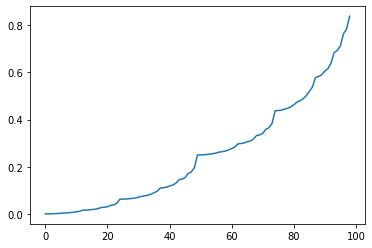

In [90]:
# Plotear la política final (apuesta) vs estado (capital)

# estados vs. V
plt.plot(v[1:100])

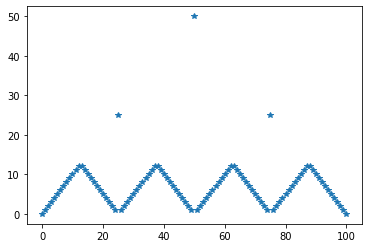

In [91]:
# Plotear capital vs política final

# Implementar!
plt.plot(policy,'*')